In [14]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [15]:
#resize images to same size

IMAGE_SIZE=[224,224]
train_path="D:\Solar_Panel_DataSet"
valid_path="D:\Solar_Panel_Test_DataSet"

In [16]:
#import resnet 50 and add preprocessing layer to front 
#using imagenet weights
resnet=ResNet50(input_shape=IMAGE_SIZE +(3), weights='imagenet',include_top=False)

In [17]:
#dont train existing weights
for layer in resnet.layers:
    layer.trainable=False

In [18]:
#for getting no of o/p classes
folders=glob('"D:\Solar_Panel_DataSet"\*')
folders

[]

In [19]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [20]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)
# view the structure of the model
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [10]:

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory("D:\Solar_Panel_DataSet",
                                                 target_size = (224, 224),  #size of image 224,224
                                                 
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 136 images belonging to 2 classes.


In [14]:
test_set = test_datagen.flow_from_directory("D:\Solar_Panel_Test_DataSet",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 101 images belonging to 2 classes.


In [15]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\admin\anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
5/5 [==============================] - 50s 9s/step - loss: 7.1516 - accuracy: 0.5441 - val_loss: 4.3016 - val_accuracy: 0.5446
Epoch 2/50
5/5 [==============================] - 39s 8s/step - loss: 2.6524 - accuracy: 0.5074 - val_loss: 1.2663 - val_accuracy: 0.6436
Epoch 3/50
5/5 [==============================] - 39s 8s/step - loss: 2.1866 - accuracy: 0.6765 - val_loss: 0.4805 - val_accuracy: 0.7624
Epoch 4/50
5/5 [==============================] - 39s 8s/step - loss: 0.9111 - accuracy: 0.6176 - val_loss: 0.5706 - val_accuracy: 0.7822
Epoch 5/50
5/5 [==============================] - 39s 8s/step - loss: 0.5585 - accuracy: 0.7794 - val_loss: 0.3677 - val_accuracy: 0.8911
Epoch 6/50
5/5 [==============================] - 38s 8s/step - loss: 0.4182 - accuracy: 0.8456 - val_loss: 0.3805 - val_accuracy: 0.8416
Epoch 7/50
5/5 [==============================] - 38s 8s/step - loss: 0.3627 - accuracy: 0.8382 - val_loss: 0.2985 - val_accuracy: 0.9109
Epoch 8/50
5/5 [==================

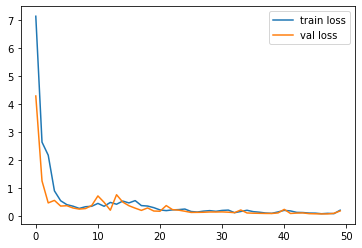

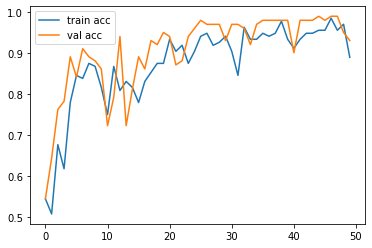

<Figure size 432x288 with 0 Axes>

In [16]:

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('fault_resnet50.h5')

C:\Users\admin\anaconda3\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [18]:
y_pred = model.predict(test_set)




In [19]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred


array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('fault_resnet50.h5')

In [23]:
f='C:/Users/admin/Documents/excel/projects/Fault detection in solar panel/test_data/solar_cell_not_faulty/125666-solar-power-rooftops.jpg'
img=image.load_img(f,target_size=(224,224))

In [24]:
x=image.img_to_array(img)
x

array([[[120., 167., 213.],
        [157., 187., 223.],
        [197., 203., 219.],
        ...,
        [ 46.,  83., 127.],
        [  8.,  41.,  76.],
        [  0.,  24.,  54.]],

       [[190., 198., 234.],
        [208., 219., 225.],
        [180., 192., 154.],
        ...,
        [  0.,  33.,  71.],
        [  4.,  34.,  68.],
        [  7.,  34.,  64.]],

       [[174., 167., 139.],
        [125., 125., 123.],
        [ 64.,  73., 112.],
        ...,
        [ 10.,  41.,  72.],
        [  5.,  31.,  64.],
        [  0.,  24.,  58.]],

       ...,

       [[  1.,   1.,   1.],
        [  3.,   3.,   3.],
        [  2.,   2.,   2.],
        ...,
        [  6.,   9.,  18.],
        [  7.,  10.,  19.],
        [  2.,   5.,  14.]],

       [[  2.,   2.,   2.],
        [  3.,   3.,   3.],
        [  1.,   1.,   1.],
        ...,
        [  6.,   9.,  18.],
        [ 12.,  15.,  24.],
        [  8.,  11.,  20.]],

       [[  3.,   3.,   3.],
        [  3.,   3.,   3.],
        [  3.,  

In [25]:
x.shape


(224, 224, 3)

In [26]:
x=x/255


In [27]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [28]:
model.predict(img_data)

array([[0.00620505, 0.9937949 ]], dtype=float32)

In [29]:
a=np.argmax(model.predict(img_data), axis=1)

In [30]:
a==1

array([ True])